# Température *HadCRUT* - *correction*

Nous avons décidé ici d'utiliser le package `prince` pour démonstration.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from prince import PCA

Attention, l'URL donnée n'était pas la bonne. La nouvelle est la suivante :

- `https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT5.0Analysis_gl.txt`

In [2]:
temp = pandas.read_table(
    "https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT5.0Analysis_gl.txt", 
    sep = "\s+", 
    names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Annual"])
temp = temp.iloc[::2]
temp = temp.iloc[:-1] # suppression de la dernière ligne (i.e. 2022 non finie)
temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1850,-0.675,-0.333,-0.591,-0.589,-0.508,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404,-0.418
1851,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228,-0.233
1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065,-0.229
1853,-0.233,-0.404,-0.280,-0.386,-0.268,-0.142,-0.083,-0.057,-0.250,-0.392,-0.411,-0.337,-0.270
1854,-0.381,-0.361,-0.243,-0.334,-0.291,-0.299,-0.179,-0.239,-0.217,-0.095,-0.410,-0.450,-0.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0.952,1.067,1.065,0.846,0.780,0.658,0.805,0.811,0.729,0.809,0.806,0.815,0.845
2018,0.711,0.796,0.790,0.822,0.713,0.738,0.733,0.735,0.676,0.869,0.745,0.824,0.763
2019,0.800,0.844,1.076,0.939,0.778,0.809,0.857,0.858,0.803,0.956,0.937,1.037,0.891
2020,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.013,0.693,0.923


## Description

In [3]:
temp.describe().round(2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,-0.11,-0.11,-0.13,-0.10,-0.10,-0.07,-0.05,-0.03,-0.05,-0.05,-0.09,-0.12,-0.08
std,0.42,0.42,0.43,0.40,0.37,0.35,0.33,0.34,0.34,0.37,0.39,0.40,0.36
min,-1.04,-0.84,-0.84,-0.66,-0.66,-0.64,-0.59,-0.60,-0.64,-0.68,-0.68,-0.90,-0.60
25%,-0.39,-0.42,-0.43,-0.39,-0.36,-0.31,-0.29,-0.27,-0.31,-0.33,-0.39,-0.42,-0.34
50%,-0.19,-0.22,-0.22,-0.18,-0.18,-0.15,-0.13,-0.11,-0.13,-0.10,-0.14,-0.22,-0.18
75%,0.12,0.11,0.08,0.14,0.11,0.09,0.06,0.12,0.12,0.10,0.06,0.10,0.08
max,1.09,1.22,1.18,1.06,0.91,0.82,0.86,0.95,0.87,1.01,1.01,1.04,0.93


Pas de distribution dissymétrique, mais quelques valeurs extrêmes toutefois.

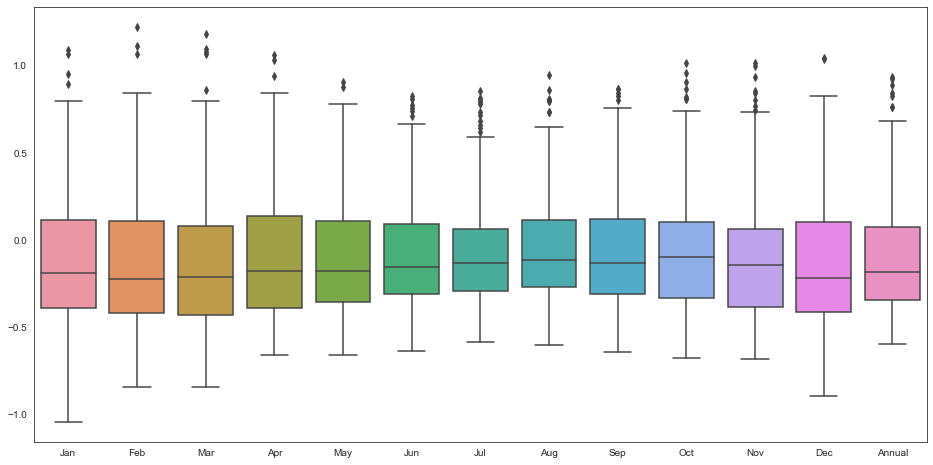

In [4]:
plt.figure(figsize = (16, 8))
seaborn.boxplot(data = temp)
plt.show()

La représentation de l'évolution des anomalies moyennes annuelles permet de voir que la température est en augmentation, particulièrement depuis le milieu des années 1970.

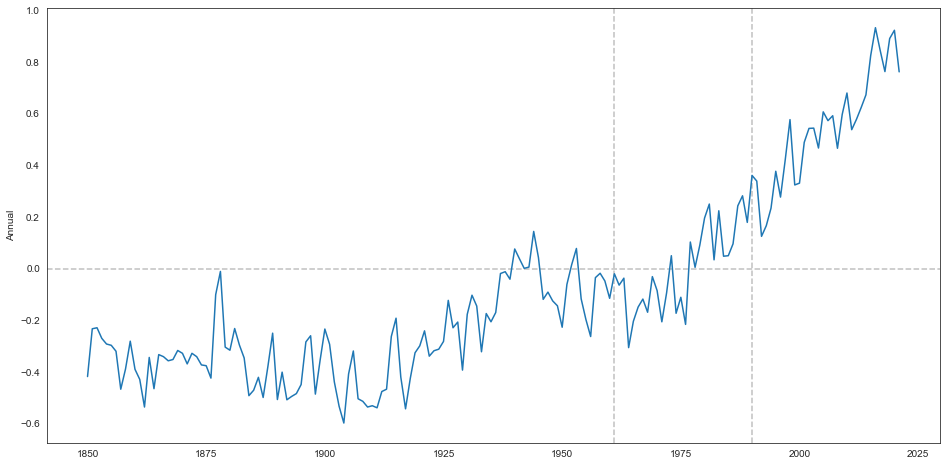

In [5]:
plt.figure(figsize = (16, 8))
plt.axhline(y = 0, linestyle = "dashed", color = "gray", alpha = .5)
plt.axvline(x = 1961, linestyle = "dashed", color = "gray", alpha = .5)
plt.axvline(x = 1990, linestyle = "dashed", color = "gray", alpha = .5)
seaborn.lineplot(x = temp.index, y = "Annual", data = temp)
plt.show()

## Analyse

In [6]:
temp2 = temp[temp.columns[:12]]
temp2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1850,-0.675,-0.333,-0.591,-0.589,-0.508,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404
1851,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228
1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065
1853,-0.233,-0.404,-0.280,-0.386,-0.268,-0.142,-0.083,-0.057,-0.250,-0.392,-0.411,-0.337
1854,-0.381,-0.361,-0.243,-0.334,-0.291,-0.299,-0.179,-0.239,-0.217,-0.095,-0.410,-0.450
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0.952,1.067,1.065,0.846,0.780,0.658,0.805,0.811,0.729,0.809,0.806,0.815
2018,0.711,0.796,0.790,0.822,0.713,0.738,0.733,0.735,0.676,0.869,0.745,0.824
2019,0.800,0.844,1.076,0.939,0.778,0.809,0.857,0.858,0.803,0.956,0.937,1.037
2020,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.013,0.693


In [7]:
pca = PCA(n_components = 12)
pca.fit(temp2)

PCA(n_components=12)

In [8]:
eig = pandas.DataFrame({
    "Dimension": ["Dim"+str(i+1) for i in range(12)],
    "Valeurs propres": pca.eigenvalues_,
    "% expliquée": pca.explained_inertia_ * 100,
    "% expliquée cumulée": numpy.cumsum(pca.explained_inertia_) * 100
})
eig.round(2)

,Dimension,Valeurs propres,% expliquée,% expliquée cumulée
0,Dim1,11.04,91.97,91.97
1,Dim2,0.32,2.64,94.61
2,Dim3,0.14,1.14,95.76
3,Dim4,0.12,0.98,96.73
4,Dim5,0.09,0.78,97.52
5,Dim6,0.07,0.60,98.12
6,Dim7,0.05,0.44,98.56
7,Dim8,0.05,0.39,98.95
8,Dim9,0.04,0.33,99.28
9,Dim10,0.03,0.27,99.55


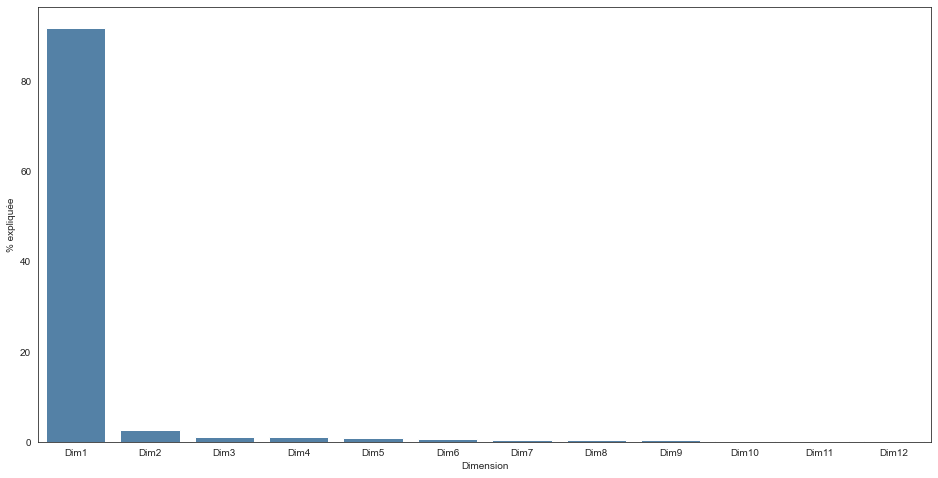

In [9]:
plt.figure(figsize = (16, 8))
seaborn.barplot(x = "Dimension", y = "% expliquée", data = eig, color = "steelblue")
plt.show()

In [10]:
pca.column_correlations(temp2).round(2) 

,0,1,2,3,4,5,6,7,8,9,10,11
Apr,0.97,-0.13,0.08,-0.09,-0.04,-0.04,0.01,-0.03,-0.04,0.05,-0.13,-0.02
Aug,0.97,0.09,0.09,0.07,-0.01,0.08,-0.05,-0.00,-0.10,-0.06,-0.02,0.09
Dec,0.93,0.23,-0.19,-0.12,0.16,-0.00,-0.05,-0.04,-0.02,0.01,-0.01,-0.01
Feb,0.94,-0.27,-0.11,0.01,0.01,0.17,0.08,-0.05,0.01,0.00,0.02,0.00
Jan,0.93,-0.26,-0.15,0.15,0.02,-0.11,-0.08,0.05,0.01,-0.01,-0.01,0.01
Jul,0.97,0.06,0.13,0.06,0.09,0.05,-0.03,0.05,0.07,0.11,0.01,0.02
Jun,0.97,0.02,0.11,0.02,0.12,-0.02,0.07,0.05,0.06,-0.11,-0.02,-0.04
Mar,0.95,-0.15,0.06,-0.21,-0.08,0.02,-0.09,0.05,0.02,-0.03,0.06,-0.01
May,0.97,-0.06,0.08,-0.02,0.04,-0.14,0.08,-0.07,-0.05,0.03,0.08,0.03
Nov,0.96,0.18,-0.11,-0.02,-0.11,-0.01,0.11,0.13,-0.02,0.02,0.00,0.01


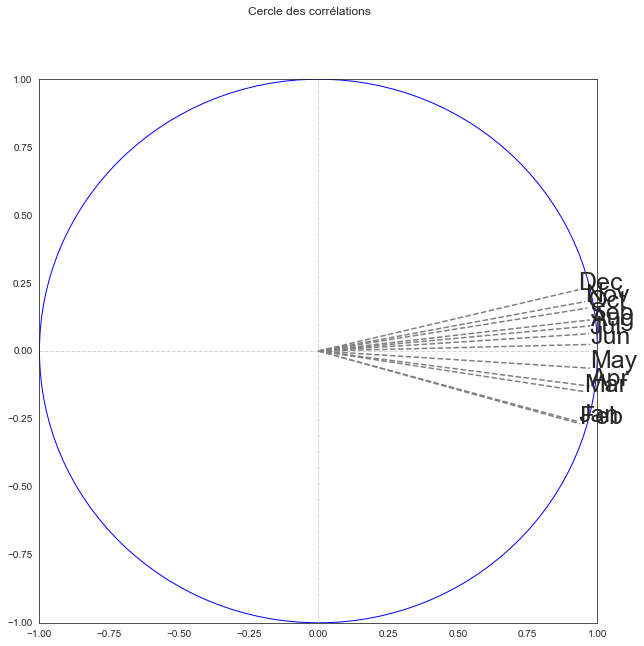

In [11]:
coord_col = pca.column_correlations(temp2)

fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(12):
    axes.text(coord_col[0][j],coord_col[1][j], coord_col.index[j], size = 25)
    axes.plot([0,coord_col[0][j]], [0,coord_col[1][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

No handles with labels found to put in legend.


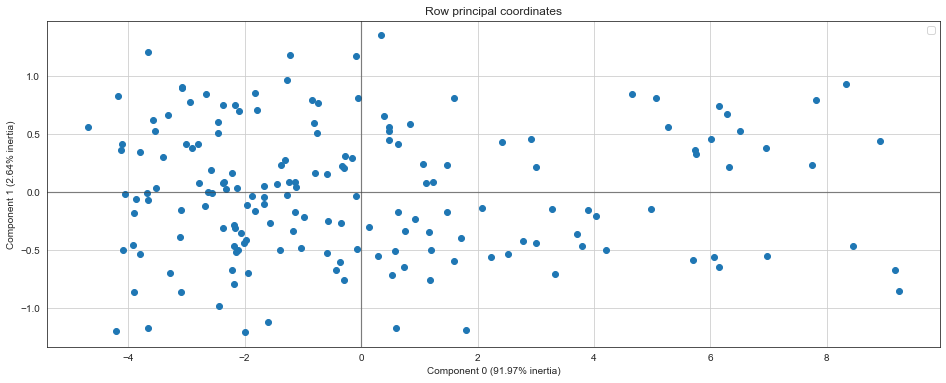

In [12]:
pca.plot_row_coordinates(temp2, figsize = (16, 6))
plt.show()

In [13]:
coord = pca.row_coordinates(temp2)
coord

,0,1,2,3,4,5,6,7,8,9,10,11
1850,-3.013916,0.414589,0.129828,0.062927,0.411385,0.787879,0.307233,0.423598,-0.148459,0.213379,0.170442,0.235558
1851,-1.277870,0.970020,-0.178033,0.919835,0.083689,-0.328420,0.154492,0.050576,0.214179,-0.099702,0.255148,0.190694
1852,-1.226241,1.183311,0.047810,0.494266,0.916795,-0.126927,-0.143994,-0.244760,0.066551,0.046291,0.576156,-0.233795
1853,-1.666095,-0.104701,0.476875,0.200127,0.530016,0.040201,-0.368073,0.320129,-0.128719,-0.151613,0.178977,0.192121
1854,-1.880906,-0.037742,0.325393,-0.027352,-0.319604,0.008253,-0.221165,-0.248566,0.365476,0.029098,0.164782,0.044189
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,8.447429,-0.464507,-0.193250,-0.134794,-0.041401,0.298607,-0.241313,0.007203,0.052335,0.157913,0.211925,0.200792
2018,7.753365,0.234519,0.028809,-0.101777,0.098699,0.039813,0.000612,-0.201968,0.235750,-0.026257,-0.147324,0.086749
2019,8.916085,0.440893,-0.016997,-0.420714,0.028281,0.086373,-0.256281,0.032972,0.159303,0.027128,-0.062700,0.045573
2020,9.167647,-0.676318,0.024607,0.037763,-0.306905,-0.006077,0.219525,0.294126,-0.087687,0.138889,0.016143,-0.158172


In [14]:
contrib = pca.row_contributions(temp2)
contrib.round(0)

,0,1,2,3,4,5,6,7,8,9,10,11
1850,1.0,1.0,0.0,0.0,2.0,9.0,2.0,4.0,1.0,1.0,1.0,2.0
1851,0.0,3.0,0.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0
1852,0.0,4.0,0.0,2.0,9.0,0.0,0.0,1.0,0.0,0.0,12.0,2.0
1853,0.0,0.0,2.0,0.0,3.0,0.0,3.0,2.0,0.0,1.0,1.0,1.0
1854,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,6.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0
2018,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2019,7.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2020,8.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0


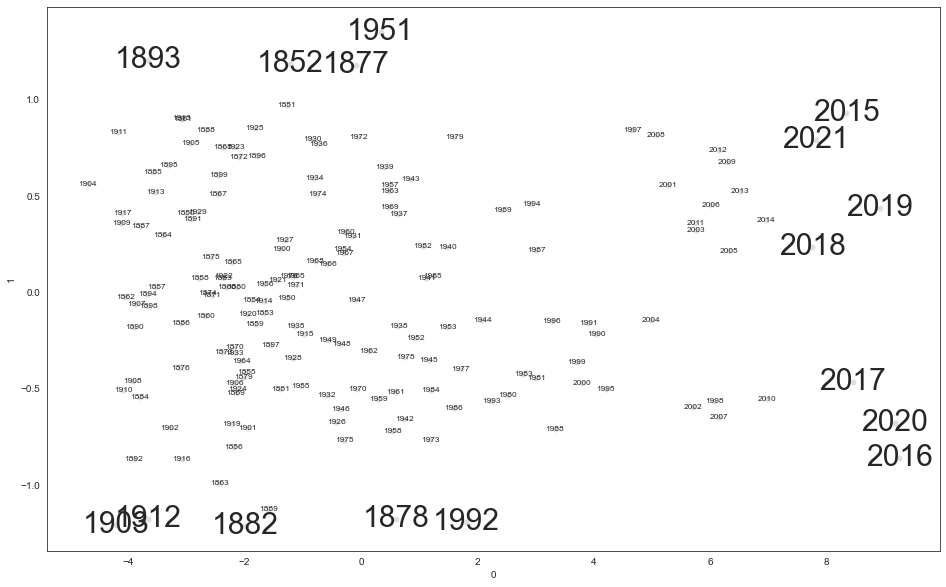

In [15]:
plt.figure(figsize = (16, 10))
seaborn.scatterplot(x = 0, y = 1, data = coord, color = "gray", alpha = .25)
for i in range(coord.shape[0]):
    taille = "small"
    if (contrib.iloc[i][0] > 5):
        taille = 30
    if (contrib.iloc[i][1] > 4):
        taille = 30
    plt.text(coord.iloc[i][0], coord.iloc[i][1], coord.index[i], fontsize = taille, ha = "center", va = "center")

In [16]:
pandas.DataFrame(temp.mean()).transpose().round(3).rename(index = {0: "Moyenne"})

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
Moyenne,-0.109,-0.106,-0.128,-0.095,-0.1,-0.074,-0.05,-0.034,-0.052,-0.051,-0.088,-0.123,-0.084


In [17]:
# Années avec un début d'année chaud et une fin d'année froide
temp.filter(items = [1852, 1877, 1893, 1951], axis = 0)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065,-0.229
1877,-0.411,-0.209,-0.091,-0.346,-0.411,-0.138,-0.016,0.211,0.108,0.113,0.034,-0.056,-0.101
1893,-1.045,-0.845,-0.427,-0.515,-0.572,-0.442,-0.244,-0.287,-0.365,-0.304,-0.405,-0.485,-0.495
1951,-0.360,-0.509,-0.262,-0.108,0.032,0.060,0.039,0.121,0.132,0.124,-0.072,0.069,-0.061


In [18]:
# Années avec un début d'année froid et une fin d'année chaude
temp.filter(items = [1878, 1882, 1903, 1912, 1992], axis = 0)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1878,-0.070,0.229,0.361,0.189,-0.122,0.010,-0.077,-0.047,0.021,-0.165,-0.143,-0.323,-0.011
1882,-0.025,-0.117,-0.177,-0.315,-0.326,-0.392,-0.341,-0.245,-0.150,-0.399,-0.404,-0.655,-0.296
1903,-0.434,-0.240,-0.398,-0.588,-0.516,-0.548,-0.505,-0.601,-0.560,-0.665,-0.630,-0.714,-0.533
1912,-0.329,-0.315,-0.554,-0.338,-0.335,-0.285,-0.507,-0.572,-0.644,-0.679,-0.558,-0.591,-0.476
1992,0.363,0.348,0.309,0.162,0.168,0.156,0.005,0.038,-0.090,-0.023,-0.037,0.099,0.125


In [19]:
# Années (beaucoup) plus chaudes que la moyenne
temp.filter(items = [i for i in range(2015, 2022)], axis = 0)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
2015,0.740,0.782,0.795,0.701,0.731,0.760,0.715,0.799,0.826,1.015,0.996,1.042,0.825
2016,1.088,1.224,1.182,1.030,0.880,0.777,0.778,0.949,0.846,0.819,0.844,0.779,0.933
2017,0.952,1.067,1.065,0.846,0.780,0.658,0.805,0.811,0.729,0.809,0.806,0.815,0.845
2018,0.711,0.796,0.790,0.822,0.713,0.738,0.733,0.735,0.676,0.869,0.745,0.824,0.763
2019,0.800,0.844,1.076,0.939,0.778,0.809,0.857,0.858,0.803,0.956,0.937,1.037,0.891
2020,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.013,0.693,0.923
2021,0.701,0.565,0.726,0.760,0.706,0.713,0.792,0.799,0.867,0.907,0.854,0.751,0.762
